<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/edo/blob/main/banco_preguntas/trabajo_final_dinamica_poblacional/7_olivar_montes_edwin/especies_en_riesgo_edwin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

## Especies en peligro

Una organización de conservación libera 25 iguanas de Caucasia en el campus de la Seccional Bajo Cauca de la Universidad de Antioquia.   

Después de 1 años, hay 39 iguanas en la zona.   

La seccional tiene una capacidad límite o de soporte de 350 iguanas.  

a) Escribir una ecuación logística que modele la población de las panteras en el refugio. 

Recuerde que en general la ecuación diferencial logística tiene la forma:

$$ \frac{dy}{dt} = ky(1 - \frac{y}{L}) $$

b) Encontrar la población después de 5 años.  

c) ¿Cuándo la población será de 100 iguanas?  

d) Escribir una ecuación diferencial logística que modele la tasa de crecimiento de la población de las iguanas. 

Entonces repetir el apartado b) mediante el método de Euler con un tamaño de paso de $h = 1$. 

Comparar la aproximación con las respuestas exactas.  

e) ¿En qué tiempo la población de iguanas crecerá más rápidamente? Explicar.

## Solución

## Escribe el modelo o PVI que representa el problema y cuya solución permite realizar predicciones sobre el comportamiento de la especie en riesgo

$$ \frac{dp}{dt} = kp\left(1 - \frac{p}{350} \right), \ \ \ \ \ \ p(0) = 25,\ \ \ \ \  p(1) = 39 $$

donde $k$ es la constante de proporcionalidad y $t$ es medido en años.

## Redacta una interpretación de la ED y de la condición inicial 

La velocidad de crecimiento de la población de panteras en un tiempo $t$, $\frac{dp}{dt}(t)$,  es proporcional al número de panteras en el mismo año $t$, $p(t)$ y al porcentaje de iguanas faltantes para llegar a la población límite en el refugio, $\left(1-\frac{p(t)}{500}\right)$. 

## Clasifica la ED que hace parte del PVI para poder establecer el método de solución del problema 

La ED dada es una Ecuación de primer orden pues la única derivada de presente en la ED es de orden 1.  

La ED es separable pues es de la forma:

$$p' = F(p)G(t)$$
 

## Soluciona analíticamente el PVI, es decir, redacta en lenguaje latex la solución describiendo o justificando, según el caso, cada paso del proceso de solución

$$ \frac{dp}{dt} = kp\left( 1 - \frac{p}{350}\right), \ \ \ p(0) = 25, \ \ p(2) = 39 $$

Empecemos sepando las variables transponiendo factores: 

$$\frac{1}{p\left( 1 - \frac{p}{350} \right)} dp = kdt $$


## Clasifica la ED utilizando la función `classify_ode()` de sympy

In [3]:
from sympy import var, Function, diff, Eq, classify_ode

In [4]:
p,t, k = var('p,t,k')
p = Function('p')
eq = Eq(diff(p(t), t), k*p(t)*(1-p(t)/350))
classify_ode(eq, p(t))

('factorable',
 'separable',
 '1st_exact',
 'Bernoulli',
 '1st_rational_riccati',
 '1st_power_series',
 'lie_group',
 'separable_Integral',
 '1st_exact_Integral',
 'Bernoulli_Integral')

## Soluciona con sympy el PVI

In [12]:
from sympy import var, Function, Eq, diff, classify_ode, dsolve, checkodesol, solve

In [13]:
p,t,k = var('p,t,k')

In [14]:
p = Function('p')

In [15]:
l = 350
eq = Eq(diff(p(t),t), k*p(t)*(1-p(t)/l))
eq 

Eq(Derivative(p(t), t), k*(1 - p(t)/350)*p(t))

In [16]:
sol_gen = dsolve(eq, p(t), hint = 'separable') 
sol_gen 

Eq(p(t), 350/(C1*exp(-k*t) + 1))

La anterior es la solución general explícita de la ED que hace parte del PVI

In [17]:
p0 = 25
solucion_pvi = dsolve(eq, p(t), hint = 'separable', ics = {sol_gen.lhs.subs(t, 0):p0})
solucion_pvi 

Eq(p(t), 350/(1 + 13*exp(-k*t)))

Pero todavía no conocemos la constante de proporcionalidad $k$. 

## Determine el valor de la constante de proporcionalidad $k$

In [20]:
eq_k = Eq(solucion_pvi.lhs.subs(t,1).subs(p(1), 39), solucion_pvi.rhs.subs(t,1))
eq_k

Eq(39, 350/(1 + 13*exp(-k)))

In [22]:
solve(39-350/(1+13*exp(-k)), k)[0] # ojo, solve es una función que pide la ecuación igualada a cero

log(507/311)

In [24]:
round(log(507/311),2)

0.49

Entonces la solución del PVI con la constante de proporcionalidad $k$ es 


$$ p(t) = \frac{350}{13e^{-0.49t} + 1} $$


In [29]:
sol_completa = solucion_pvi.subs(k, log(507/311))
sol_completa 

Eq(p(t), 350/(1 + 13*exp(-0.488718091411949*t)))

## Verifica que la solución encontrada es correcta utilizando sympy

In [31]:
from sympy import checkodesol

In [33]:
checkodesol(eq,sol_gen)

(True, 0)

In [37]:
sol_completa.subs(t,3.3)

Eq(p(3.3), 97.4563404229809)

## Gráfica animada de la solución general

## Cinco observaciones o inferencias del gráfico animado de la solución general

## Grafica con Matplotlib la solución del PVI

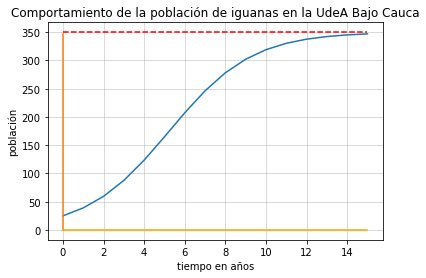

In [40]:
import numpy as np 
import matplotlib.pyplot as plt 

fig, ax = plt.subplots() 

ax.set(title = 'Comportamiento de la población de iguanas en la UdeA Bajo Cauca',\
      xlabel = 'tiempo en años', ylabel = 'población')

dominio = np.arange(0,16)
l = 350
rango = 350/(13*np.exp(-0.49*dominio) + 1)

ax.plot(dominio, rango) # grafica de la curva de población 
ax.plot([0, 0], [0, np.max(rango)]) # grafico del eje vertical
ax.plot([np.min(dominio), np.max(dominio)], [0,0], 'orange')   # gráfico del eje horizontal
ax.plot([0, np.max(dominio)], [l, l], 'r--')  # grafico de la asíntota horizontal
ax.grid(alpha = 0.6)


## Cinco observaciones o inferencias del gráfico de la solución del PVI

## Gráfico de la función derivada $\frac{dp}{dt}(t)$

In [42]:
def p(t):
    return 350/(13*np.exp(-0.49*t) + 1)

In [45]:
def derivada_de_p(t):
    return 0.49*p(t)*(1-p(t)/350)

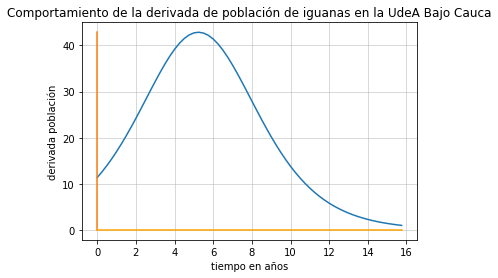

In [48]:
import numpy as np 
import matplotlib.pyplot as plt 

fig, ax = plt.subplots() 

ax.set(title = 'Comportamiento de la derivada de población de iguanas en la UdeA Bajo Cauca',\
      xlabel = 'tiempo en años', ylabel = 'derivada población')

dominio = np.arange(0,16, 0.25)
l = 350
rango = [derivada_de_p(t) for t in dominio]

ax.plot(dominio, rango) # grafica de la curva derivada de población 
ax.plot([0, 0], [0, np.max(rango)]) # grafico del eje vertical
ax.plot([np.min(dominio), np.max(dominio)], [0,0], 'orange')   # gráfico del eje horizontal

ax.grid(alpha = 0.6)


## Cinco observaciones o inferencias del gráfico de la función velocidad de crecimiento de la población de iguanas

1.  
2.  
3.  
4.  
5.  

# El método de Euler  

Página 429 de larson, sección 6.1: Campo de pendientes y método de Euler

El método de Euler es un método numérico para aproximar la solución particular de la ecuación diferencial

$$ y' = F(x, y)$$


## Referencias

* Página 452 de Zill. 

In [9]:
from sympy import * 
x = Symbol('x')

In [11]:
solve((x+1,0),x)

{x: -1}